## Data Wrangling for Google PlayStore App dataset

In [1]:
import pandas as pd
app=pd.read_csv('googleplaystore.csv')
review=pd.read_csv('googleplaystore_user_reviews.csv')
print(review.head())
print(review.shape)
print(review.columns)
print(review.info())
print(len(app.Rating))

                     App                                  Translated_Review  \
0  10 Best Foods for You  I like eat delicious food. That's I'm cooking ...   
1  10 Best Foods for You    This help eating healthy exercise regular basis   
2  10 Best Foods for You                                                NaN   
3  10 Best Foods for You         Works great especially going grocery store   
4  10 Best Foods for You                                       Best idea us   

  Sentiment  Sentiment_Polarity  Sentiment_Subjectivity  
0  Positive                1.00                0.533333  
1  Positive                0.25                0.288462  
2       NaN                 NaN                     NaN  
3  Positive                0.40                0.875000  
4  Positive                1.00                0.300000  
(64295, 5)
Index(['App', 'Translated_Review', 'Sentiment', 'Sentiment_Polarity',
       'Sentiment_Subjectivity'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
Ra

It seems that there are missing values in many of the columns of the first dataset. The columns include rating, type, 
content rating, current ver and android ver. Missing values are also observed in the second dataset, in columns: Translated_Review, Sentiment, Sentiment_Polarity
and Sentiment_Subjectivity.

In [2]:
## For app dataset, rows with missing value (NaN) will be removed and for review dataset, rows with missing values in 
## setiment will be removed. 
new_app=app.dropna(axis=0, how='any')
new_app=new_app.drop_duplicates('App')
new_rev=review.dropna(axis=0, how='any')
print(new_app.info())
print(new_rev.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8190 entries, 0 to 10840
Data columns (total 13 columns):
App               8190 non-null object
Category          8190 non-null object
Rating            8190 non-null float64
Reviews           8190 non-null object
Size              8190 non-null object
Installs          8190 non-null object
Type              8190 non-null object
Price             8190 non-null object
Content Rating    8190 non-null object
Genres            8190 non-null object
Last Updated      8190 non-null object
Current Ver       8190 non-null object
Android Ver       8190 non-null object
dtypes: float64(1), object(12)
memory usage: 895.8+ KB
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 37427 entries, 0 to 64230
Data columns (total 5 columns):
App                       37427 non-null object
Translated_Review         37427 non-null object
Sentiment                 37427 non-null object
Sentiment_Polarity        37427 non-null float64
Sentiment_Subjectivity 

In [3]:
## Assert that there is no missing value:
assert pd.notnull(new_app).all().all()
assert pd.notnull(new_rev).all().all()

In [4]:
## Assert that all ratings in new_app are above 0:
assert (new_app['Rating']>0).all().all()

Now both original datasets have been cleaned up to remove missing values and the revised datasets are good to use for 
analysis.

The next step is to check outliers of Ratings, Sentiment_Polarity and Sentiment_Subjectivity from App and Review datasets.First, we want to identify what kinds of distribution each of these three data follows.

Begin with Rating data.

In [5]:
import matplotlib.pyplot as plt
f, axs = plt.subplots(3,2,figsize=(15,15))
plt.subplot(3, 2, 1)
new_app['Rating'].plot(kind='hist', title='Ratings')
plt.subplot(3, 2, 2)
new_app['Rating'].plot(kind='box')
plt.subplot(3, 2, 3)
new_rev['Sentiment_Polarity'].plot(kind='hist', title='Sentiment_Polarity')
plt.subplot(3, 2, 4)
new_rev['Sentiment_Polarity'].plot(kind='box')
plt.subplot(3, 2, 5)
new_rev['Sentiment_Subjectivity'].plot(kind='hist', title='Sentiment_Subjectivity')
plt.subplot(3, 2, 6)
new_rev['Sentiment_Subjectivity'].plot(kind='box')

plt.show()

<Figure size 1500x1500 with 6 Axes>

It looks like the Rating data is not normally distributed. Instead, the Rating data seems to be left-skewed. We will try to log-transform the data into log(Rating).

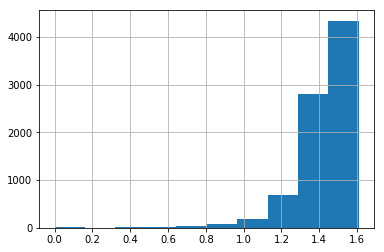

In [6]:
import numpy as np
new_app['Rating'].apply(np.log).hist()

It turned out the log transformation is not a solution to Rating data. Now, let's try exponential transformation on Rating data:

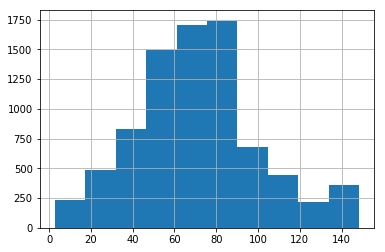

In [7]:
new_app['Rating'].apply(np.exp).hist()

The exponentially transformed Rating data follows normal distribution. Now, let's check if there is any outlier in the transformed Rating data:

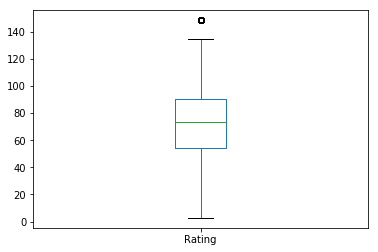

In [8]:
new_app['Rating'].apply(np.exp).plot(kind='box')
plt.show()

It turned out there is indeed outlier in the transformed Rating data. We need to identify this(these) data point(s) before making decision on whether to remove the outliers. The next step is to identify the outlier. 

In [9]:
## Add the transformed Rating data to the dataset, and name it exp_rating.
new_app['exp_rating']=new_app['Rating'].apply(np.exp)

## Define a function to locate outliers: the theory is to find data with difference from sample mean bigger than twice
## the standard deviation
def locate_outliers(data,n):
    return data[abs(data[n] - np.mean(data[n])) > 2 * np.std(data[n])]

In [10]:
locate_outliers(new_app,'exp_rating').head(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,exp_rating
55,Tickets SDA 2018 and Exam from the State Traff...,AUTO_AND_VEHICLES,4.9,10479,33M,"100,000+",Free,0,Everyone,Auto & Vehicles,"July 18, 2018",1.7.1,4.0 and up,134.28978
61,CDL Practice Test 2018 Edition,AUTO_AND_VEHICLES,4.9,7774,17M,"100,000+",Free,0,Everyone,Auto & Vehicles,"July 3, 2018",1.7,4.2 and up,134.28978
64,DMV Permit Practice Test 2018 Edition,AUTO_AND_VEHICLES,4.9,6090,27M,"100,000+",Free,0,Everyone,Auto & Vehicles,"July 3, 2018",1.7,4.2 and up,134.28978
79,Tickets + PDA 2018 Exam,AUTO_AND_VEHICLES,4.9,197136,38M,"1,000,000+",Free,0,Everyone,Auto & Vehicles,"July 15, 2018",8.31,4.1 and up,134.28978
99,"ipsy: Makeup, Beauty, and Tips",BEAUTY,4.9,49790,14M,"1,000,000+",Free,0,Everyone,Beauty,"November 9, 2017",2.3.0,4.1 and up,134.28978


As we can see from the above table, these suspected outliers dont seem to be not 'wrong' or false input. These ratings are independent from each other and without seeing the detailed review on these apps, there is no strong reason to exclude them. Next, we will locate the 'outliers' for sentiment_polarity data:

In [11]:
locate_outliers(new_rev,'Sentiment_Polarity').head(5)

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.000000,0.533333
4,10 Best Foods for You,Best idea us,Positive,1.000000,0.300000
5,10 Best Foods for You,Best way,Positive,1.000000,0.300000
13,10 Best Foods for You,Greatest ever Completely awesome maintain heal...,Positive,0.992188,0.866667
19,10 Best Foods for You,One greatest apps.,Positive,1.000000,1.000000


Again, these polarity ratings seem valid, and there is no strong reason to exclude them. Therefore, the detected outliers in App rating and sentiment polarity data will not be excluded in further analysis.

The next data cleaning steps include:1. datetime parsing 2. remove faulty App size 3.remove dollar signs 4. remove megabite signs 5. remove '+' sign in installs

In [12]:
##1. datetime parsing 
from datetime import datetime
new_app[ 'Last Updated' ]=[datetime.strptime(x, '%B %d, %Y') for x in new_app[ 'Last Updated' ]]
print(new_app.head(5))

                                                 App        Category  Rating  \
0     Photo Editor & Candy Camera & Grid & ScrapBook  ART_AND_DESIGN     4.1   
1                                Coloring book moana  ART_AND_DESIGN     3.9   
2  U Launcher Lite – FREE Live Cool Themes, Hide ...  ART_AND_DESIGN     4.7   
3                              Sketch - Draw & Paint  ART_AND_DESIGN     4.5   
4              Pixel Draw - Number Art Coloring Book  ART_AND_DESIGN     4.3   

  Reviews  Size     Installs  Type Price Content Rating  \
0     159   19M      10,000+  Free     0       Everyone   
1     967   14M     500,000+  Free     0       Everyone   
2   87510  8.7M   5,000,000+  Free     0       Everyone   
3  215644   25M  50,000,000+  Free     0           Teen   
4     967  2.8M     100,000+  Free     0       Everyone   

                      Genres Last Updated         Current Ver   Android Ver  \
0               Art & Design   2018-01-07               1.0.0  4.0.3 and up   
1  Art

During this data cleaning step, abnormal input in App Size is also observed, with non-numerical value of 'Varies with device'. Therefore, the rows with  Size= 'Varies with device' will be removed.

In [13]:
##2. remove faulty App size
new_app = new_app[new_app.Size!= 'Varies with device']

In [14]:
##3.remove dollar signs
new_app[ 'Price' ]=[float(x.strip('$')) for x in new_app.Price]

In [15]:
##4. remove megabyte signs and kilobyte sign
new_app['Size']=[x.strip('M') for x in new_app.Size]
new_app.Size=[float(x.strip('k'))/1000 if 'k' in x else float(x) for x in new_app.Size]

In [16]:
##5. remove '+' sign in installs and convert string to integer for Review column
new_app[ 'Installs' ]=[x.strip('+')for x in new_app.Installs]
new_app[ 'Reviews' ]=[int(x)for x in new_app.Reviews]
new_app[ 'Installs' ]=[int(x.replace(',','')) if ',' in x else int(x) for x in new_app.Installs]
print(new_app.head(5))
print(new_app.info())

                                                 App        Category  Rating  \
0     Photo Editor & Candy Camera & Grid & ScrapBook  ART_AND_DESIGN     4.1   
1                                Coloring book moana  ART_AND_DESIGN     3.9   
2  U Launcher Lite – FREE Live Cool Themes, Hide ...  ART_AND_DESIGN     4.7   
3                              Sketch - Draw & Paint  ART_AND_DESIGN     4.5   
4              Pixel Draw - Number Art Coloring Book  ART_AND_DESIGN     4.3   

   Reviews  Size  Installs  Type  Price Content Rating  \
0      159  19.0     10000  Free    0.0       Everyone   
1      967  14.0    500000  Free    0.0       Everyone   
2    87510   8.7   5000000  Free    0.0       Everyone   
3   215644  25.0  50000000  Free    0.0           Teen   
4      967   2.8    100000  Free    0.0       Everyone   

                      Genres Last Updated         Current Ver   Android Ver  \
0               Art & Design   2018-01-07               1.0.0  4.0.3 and up   
1  Art & Des

All of the numeric data has been converted to numeric values for further analysis.

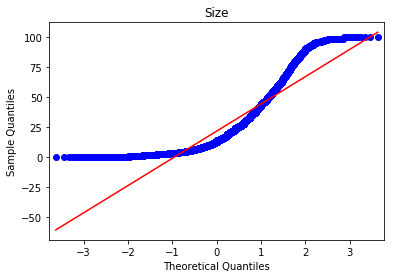

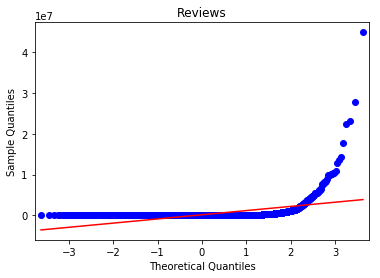

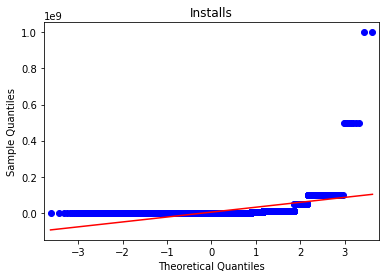

In [17]:
# Check distribution of app size,number of reviews and number of installs:
from statsmodels.graphics.gofplots import qqplot
qqplot(new_app.Size, line='s')
plt.title('Size')
plt.show()

qqplot(new_app.Reviews, line='s')
plt.title('Reviews')
plt.show()

qqplot(new_app.Installs, line='s')
plt.title('Installs')
plt.show()

It seems from the distribution, none of these parameters are normally distributed.

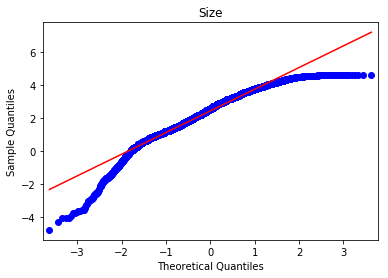

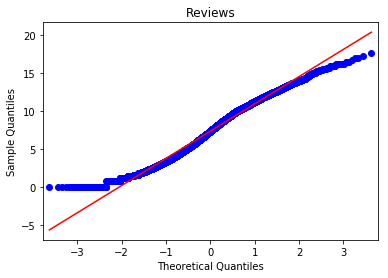

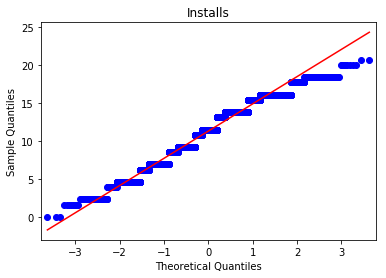

In [18]:
# Check distribution of log transformed app size,number of reviews and number of installs:
from statsmodels.graphics.gofplots import qqplot
qqplot(new_app.Size.apply(np.log), line='s')
plt.title('Size')
plt.show()

qqplot(new_app.Reviews.apply(np.log), line='s')
plt.title('Reviews')
plt.show()

qqplot(new_app.Installs.apply(np.log), line='s')
plt.title('Installs')
plt.show()

In [19]:
from numpy.random import seed
from numpy.random import randn
from scipy.stats import normaltest
stat1, p1 = normaltest(new_app.Size.apply(np.log))
stat2, p2 = normaltest(new_app.Reviews.apply(np.log))
stat3, p3 = normaltest(new_app.Installs.apply(np.log))
# interpret
alpha = 0.05
if p1 > alpha:
	print('According to shapiro test, App size looks normalm distributed (fail to reject H0)')
else:
	print('Log transformed App size does not look Gaussian (reject H0)')
    
if p2 > alpha:
	print('According to shapiro test, App review looks normalm distributed (fail to reject H0)')
else:
	print('Log transformed App review does not look Gaussian (reject H0)')
    
if p3 > alpha:
	print('According to shapiro test, App install looks normalm distributed (fail to reject H0)')
else:
	print('Log transformed App install does not look Gaussian (reject H0)')

Log transformed App size does not look Gaussian (reject H0)
Log transformed App review does not look Gaussian (reject H0)
Log transformed App install does not look Gaussian (reject H0)


Also, based on normal distribution test, none of these log transformed parameters are normally distributed.

# Exploratory Data Analysis

### 1. First, we will look into the potential relationship between app ratings and app installs.

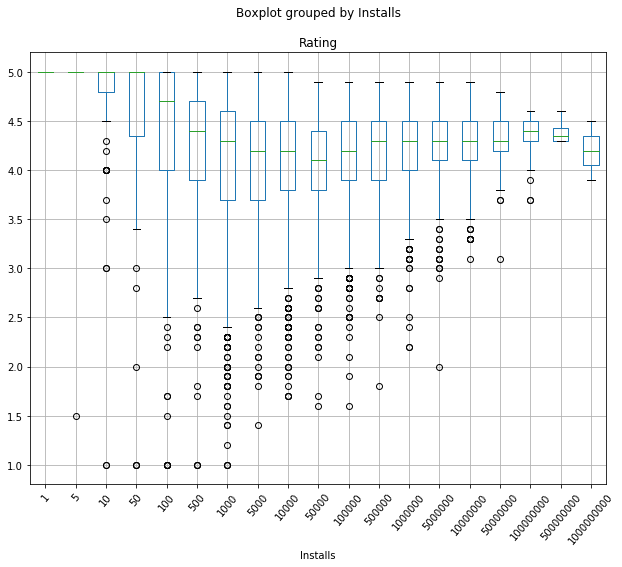

In [20]:
import matplotlib.pyplot as plt
boxplt1=new_app.boxplot(column=['Rating'], by='Installs', figsize=(10,8), rot=50)


As we can se from the plot, the mean of the app ratings did not seem to change with the number of installs.

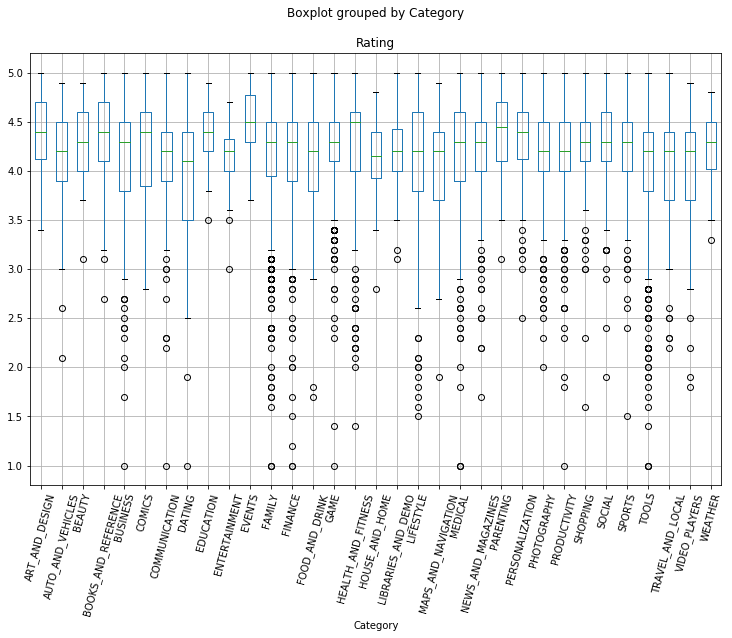

In [21]:
boxplt3=new_app.boxplot(column=['Rating'], by='Category', figsize=(12,8), rot=75)

There is no much rating difference among different App Categories.
Now, let's take a look if the average app rating changes with the installs.

Text(0.5,1,'Average rating vs. number of installs')

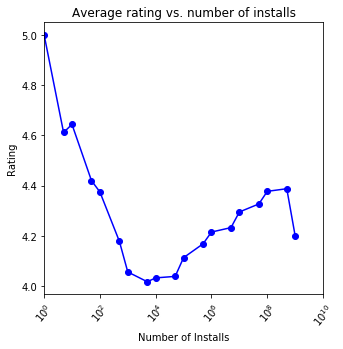

In [22]:
fig, ax = plt.subplots(figsize=(5,5))
new_app.set_index('Installs')
new_app.groupby(['Installs']).mean()['Rating'].plot(kind='line', ax=ax, rot=50, marker='o', color='b')
x_label=new_app['Installs'].unique()
ax.set_xticks(x_label)
ax.set_xscale('log')
plt.xlim(1,10000000000)
plt.xlabel('Number of Installs')
plt.ylabel('Rating')
plt.title('Average rating vs. number of installs')

The ratings of the app initially decline with the number of installs, for apps with 1 to 10000 installs. We may classify these apps as 'unpopular apps'. For the 'popular apps' with above 10000 times installs, the average app rating goes up with installs, then suddenly declines with installs when the installs hit above 10 million times.

So what is the most donwloaded app on Google Play Store?

In [23]:
new_app.sort_values(by='Installs', ascending=False).head(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,exp_rating
1654,Subway Surfers,GAME,4.5,27722264,76.0,1000000000,Free,0.0,Everyone 10+,Arcade,2018-07-12,1.90.0,4.1 and up,90.017131
3736,Google News,NEWS_AND_MAGAZINES,3.9,877635,13.0,1000000000,Free,0.0,Teen,News & Magazines,2018-08-01,5.2.0,4.4 and up,49.402449
1655,Candy Crush Saga,GAME,4.4,22426677,74.0,500000000,Free,0.0,Everyone,Casual,2018-07-05,1.129.0.2,4.1 and up,81.450869
3473,Dropbox,PRODUCTIVITY,4.4,1861310,61.0,500000000,Free,0.0,Everyone,Productivity,2018-08-01,Varies with device,Varies with device,81.450869
347,imo free video calls and chat,COMMUNICATION,4.3,4785892,11.0,500000000,Free,0.0,Everyone,Communication,2018-06-08,9.8.000000010501,4.0 and up,73.699794
1661,Temple Run 2,GAME,4.3,8118609,62.0,500000000,Free,0.0,Everyone,Action,2018-07-05,1.49.1,4.0 and up,73.699794
1662,Pou,GAME,4.3,10485308,24.0,500000000,Free,0.0,Everyone,Casual,2018-05-25,1.4.77,4.0 and up,73.699794
378,UC Browser - Fast Download Private & Secure,COMMUNICATION,4.5,17712922,40.0,500000000,Free,0.0,Teen,Communication,2018-08-02,12.8.5.1121,4.0 and up,90.017131
5596,Samsung Health,HEALTH_AND_FITNESS,4.3,480208,70.0,500000000,Free,0.0,Everyone,Health & Fitness,2018-07-31,5.17.2.009,5.0 and up,73.699794
3255,SHAREit - Transfer & Share,TOOLS,4.6,7790693,17.0,500000000,Free,0.0,Everyone,Tools,2018-07-30,4.5.28_ww,4.1 and up,99.484316


The most downloaded apps are with above 1 billion downloads, followed by apps with over half a billion downloads. Most of them are under Game category or Tech related.

In [24]:
new_app.sort_values(by='Installs', ascending=True).head(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,exp_rating
5917,Ra Ga Ba,GAME,5.0,2,20.0,1,Paid,1.49,Everyone,Arcade,2017-02-08,1.0.4,2.3 and up,148.413159
10697,Mu.F.O.,GAME,5.0,2,16.0,1,Paid,0.99,Everyone,Arcade,2017-03-03,1.0,2.3 and up,148.413159
2454,KBA-EZ Health Guide,MEDICAL,5.0,4,25.0,1,Free,0.00,Everyone,Medical,2018-08-02,1.0.72,4.0.3 and up,148.413159
9218,EB Cash Collections,BUSINESS,5.0,1,4.3,5,Free,0.00,Everyone,Business,2018-07-31,1.10,4.4 and up,148.413159
10562,FK Atlantas,SPORTS,1.5,2,26.0,5,Free,0.00,Everyone,Sports,2018-02-21,1.0,4.1 and up,4.481689
2450,Tablet Reminder,MEDICAL,5.0,4,2.5,5,Free,0.00,Everyone,Medical,2018-08-03,1.0,4.1 and up,148.413159
2484,Clinic Doctor EHr,MEDICAL,5.0,2,7.1,5,Free,0.00,Everyone,Medical,2018-08-03,1.0.51.0.3,8.0 and up,148.413159
7147,CB Heroes,SOCIAL,5.0,5,1.8,5,Free,0.00,Everyone,Social,2018-08-04,1.2.4,5.0 and up,148.413159
6700,Brick Breaker BR,GAME,5.0,7,19.0,5,Free,0.00,Everyone,Arcade,2018-07-23,1.0,4.1 and up,148.413159
2459,Anatomy & Physiology Vocabulary Exam Review App,MEDICAL,5.0,1,4.6,5,Free,0.00,Everyone,Medical,2018-08-02,2.0,4.0 and up,148.413159


### 2. Now let's take a look into the general rating distribution and how each category/genre scores on ratings.

C:\Users\hxia\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,1,'Distribution of App Rating')

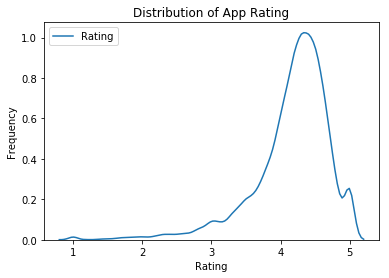

In [25]:
import seaborn as sns
dist = sns.kdeplot(new_app['Rating'])
dist.set_xlabel("Rating")
dist.set_ylabel("Frequency")
plt.title('Distribution of App Rating')

Majority of the apps have a rating of above 4.0. Some apps have really high ratings of >= 4.9, while some apps are rated below 2.0. We will dig into these top rated apps (of above 4.5) and see what genres they fall under.

Text(0.5,1,'Count of top rated apps in each category')

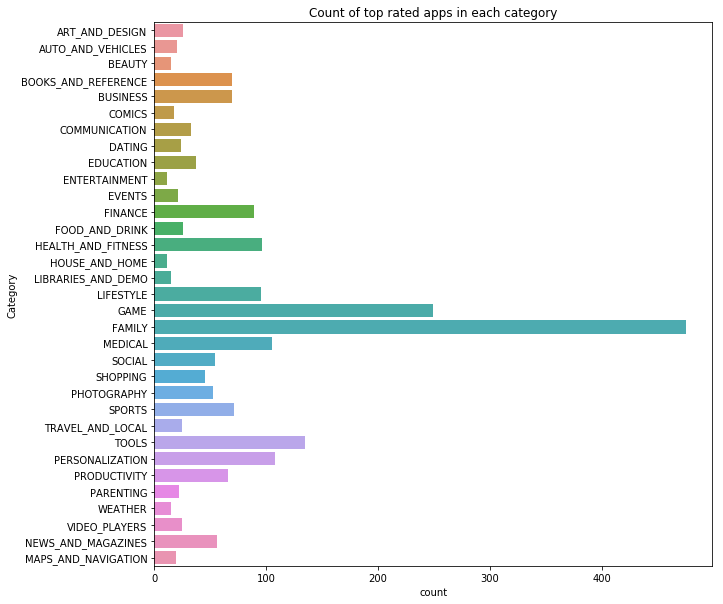

In [26]:
top_rate=new_app.loc[new_app['Rating'] >= 4.5, : ]
f, ax = plt.subplots(figsize=(10, 10))
toprate = sns.countplot(y="Category",data=top_rate)
plt.title('Count of top rated apps in each category')

As we can see from the plot, Family category apps have the most highly rated apps, followed by Game category, then Medical and Tool category.

So how many apps are in each of these categories and what is the percentage of highly rated apps for each category?

Text(0,0.5,'App Category')

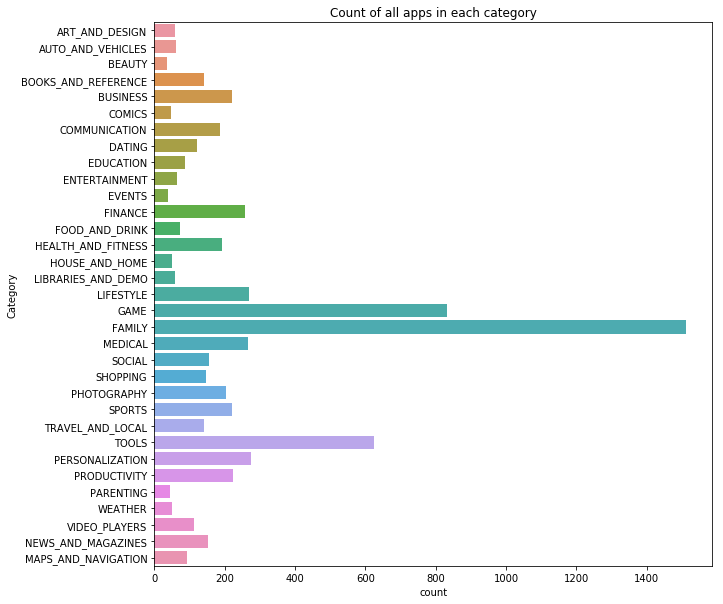

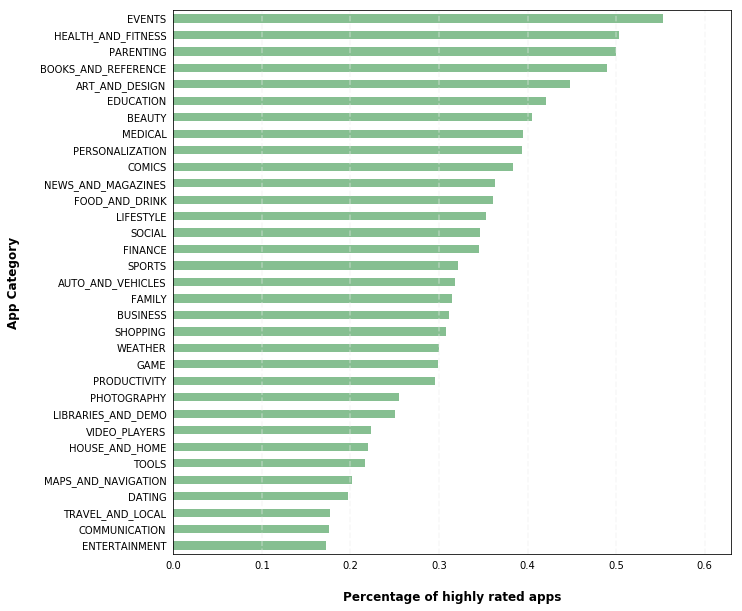

In [27]:
f, ax = plt.subplots(figsize=(10, 10))
count=sns.countplot(y="Category",data=new_app)
#count.set_xticklabels(count.get_xticklabels(), rotation=90)
plt.title('Count of all apps in each category')

top_perc=top_rate.groupby('Category').count()/new_app.groupby('Category').count()
percplt=top_perc.sort_values('App').plot(kind='barh', legend=False, figsize=(10, 10),color='#86bf91')
# Switch off ticks
percplt.tick_params(axis="both", which="both", bottom=False, top=False, labelbottom=True, left=False, right=False, 
                    labelleft=True)

# Draw vertical axis lines
vals = percplt.get_xticks()
for tick in vals:
    percplt.axvline(x=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)

# Set x-axis label
percplt.set_xlabel("Percentage of highly rated apps", labelpad=20, weight='bold', size=12)

# Set y-axis label
percplt.set_ylabel("App Category", labelpad=20, weight='bold', size=12)


It turns out that Family, Game and Tool categories also have the most apps, which explained why these three categories also have the most highly rated app. If we normalize the highly rated app nunmbers to the total app numbers, we can see that categories with the most percentage of highly rated apps are Event, Health and Fitness, then Parenting.

### 3. Price vs. Ratings

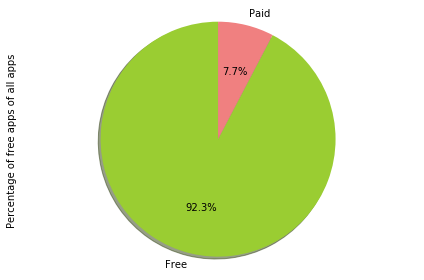

In [28]:
labels = ['Paid', 'Free']
sizes = new_app.groupby('Type').count()
colors = ['yellowgreen', 'lightcoral']
sizes['App'].plot(kind='pie', label= 'Percentage of free apps of all apps', colors=colors, 
                  shadow=True, startangle=90, autopct='%.1f%%')
plt.axis('equal')
plt.tight_layout()
plt.show()

92.5 % of the apps are free. 

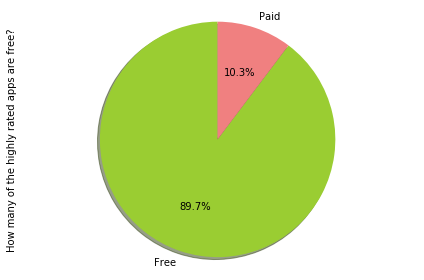

In [29]:
labels = ['Paid', 'Free']
sizes = top_rate.groupby('Type').count()
colors = ['yellowgreen', 'lightcoral']
sizes['App'].plot(kind='pie', label= 'How many of the highly rated apps are free?', 
                  colors=colors, shadow=True, startangle=90, autopct='%.1f%%')
plt.axis('equal')
plt.tight_layout()
plt.show()

It turns out that 90% of the highly rated apps are free. Price is a potential key factor to a high rating.

In [30]:
new_app.sort_values(by='Price', ascending=False).head(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,exp_rating
4367,I'm Rich - Trump Edition,LIFESTYLE,3.6,275,7.300,10000,Paid,400.00,Everyone,Lifestyle,2018-05-03,1.0.1,4.1 and up,36.598234
4362,💎 I'm rich,LIFESTYLE,3.8,718,26.000,10000,Paid,399.99,Everyone,Lifestyle,2018-03-11,1.0.0,4.4 and up,44.701184
4197,most expensive app (H),FAMILY,4.3,6,1.500,100,Paid,399.99,Everyone,Entertainment,2018-07-16,1.0,7.0 and up,73.699794
5369,I am Rich,FINANCE,4.3,180,3.800,5000,Paid,399.99,Everyone,Finance,2018-03-22,1.0,4.2 and up,73.699794
5373,I AM RICH PRO PLUS,FINANCE,4.0,36,41.000,1000,Paid,399.99,Everyone,Finance,2018-06-25,1.0.2,4.1 and up,54.598150
5364,I am rich (Most expensive app),FINANCE,4.1,129,2.700,1000,Paid,399.99,Teen,Finance,2017-12-06,2,4.0.3 and up,60.340288
5362,I Am Rich Pro,FAMILY,4.4,201,2.700,5000,Paid,399.99,Everyone,Entertainment,2017-05-30,1.54,1.6 and up,81.450869
5359,I am rich(premium),FINANCE,3.5,472,0.965,5000,Paid,399.99,Everyone,Finance,2017-05-01,3.4,4.4 and up,33.115452
5358,I am Rich!,FINANCE,3.8,93,22.000,1000,Paid,399.99,Everyone,Finance,2017-12-11,1.0,4.1 and up,44.701184
5356,I Am Rich Premium,FINANCE,4.1,1867,4.700,50000,Paid,399.99,Everyone,Finance,2017-11-12,1.6,4.0 and up,60.340288


In [31]:
new_app.sort_values(by='Price', ascending=False)[:20].Rating.mean()

3.925

C:\Users\hxia\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,1,'Distribution of prices in apps')

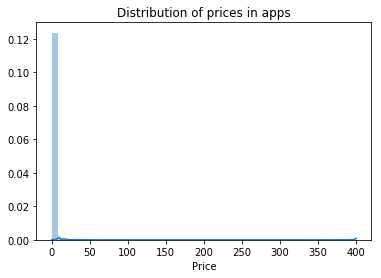

In [32]:
pricedist=sns.distplot(new_app['Price'])
pricedist.set_title('Distribution of prices in apps')

Majority of the app price is between free to a couple of dollars.

C:\Users\hxia\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\hxia\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


LinregressResult(slope=-0.0009975252275422671, intercept=4.259969958174687, rvalue=-0.11237130546277072, pvalue=0.009025887018993572, stderr=0.0003806465291091565)

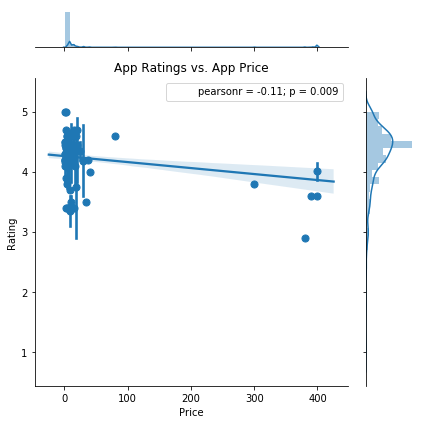

In [33]:
from scipy import stats
paid=new_app.loc[new_app['Price'] >0]
paid=paid.loc[paid['Price']<500]
price_reg=sns.jointplot(x="Price", y="Rating", data=paid, x_estimator=np.mean, kind='reg')
price_reg.annotate(stats.pearsonr)
plt.title('App Ratings vs. App Price')
plt.tight_layout()
import scipy
scipy.stats.linregress(paid['Price'],paid['Rating'])

the P value is around 0.32, which is higher than the significance level of 0.05. There is no significant correlation between app price and rating.

C:\Users\hxia\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\hxia\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


LinregressResult(slope=-0.0558410864242475, intercept=4.313832406815887, rvalue=-0.11256946228825525, pvalue=0.008904320977664104, stderr=0.021270459748865343)

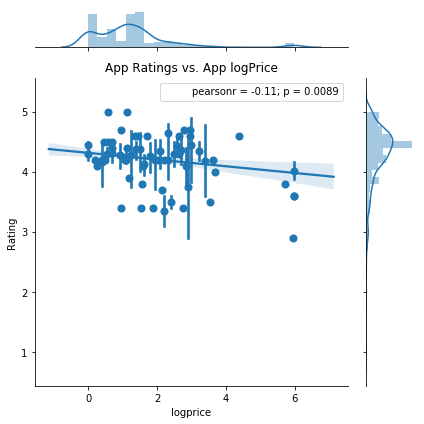

In [34]:
paid['logprice']=paid.Price.apply(np.log)
logprice_reg=sns.jointplot(x="logprice", y="Rating", data=paid, x_estimator=np.mean, kind='reg')
logprice_reg.annotate(stats.pearsonr)
plt.title('App Ratings vs. App logPrice')
plt.tight_layout()
scipy.stats.linregress(paid['logprice'],paid['Rating'])

The log transformation did improve the correlation between price and ratings. According to the regression test, there is no significant correlation between log price and app rating either. 

### 4. Price vs installs

Text(0,0.5,'Price')

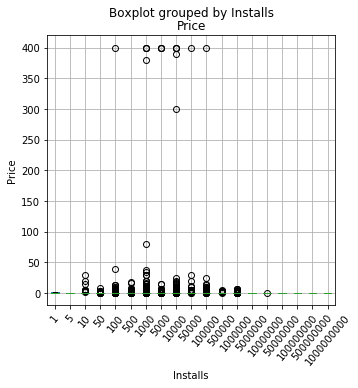

In [35]:
boxplt2=new_app.boxplot(column=['Price'], by='Installs', figsize=(5,5), rot=50)
plt.ylabel('Price')

The most downloaded apps are the apps free of charge.

C:\Users\hxia\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\hxia\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


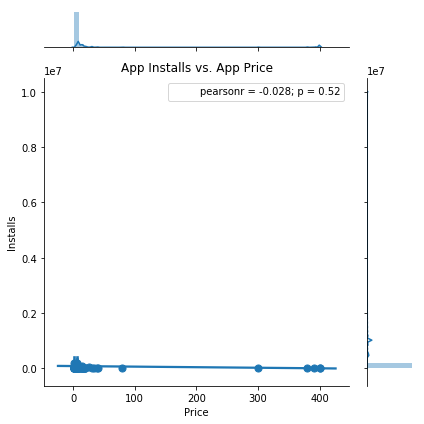

In [36]:
install_reg=sns.jointplot(x='Price', y="Installs", data=paid, x_estimator=np.mean, kind='reg')
scipy.stats.linregress(paid['Price'],paid['Installs'])
install_reg.annotate(stats.pearsonr)
plt.title('App Installs vs. App Price')
plt.tight_layout()

C:\Users\hxia\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\hxia\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


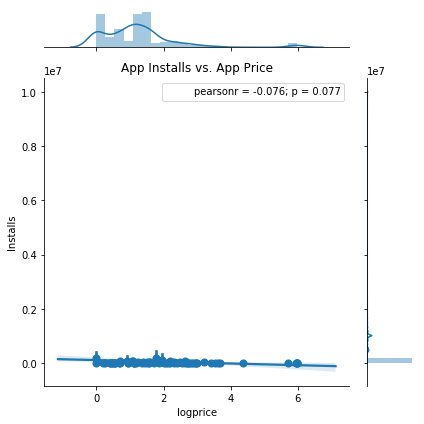

In [37]:
install_reg=sns.jointplot(x="logprice", y="Installs", data=paid, x_estimator=np.mean, kind='reg')
scipy.stats.linregress(paid['logprice'],paid['Installs'])
install_reg.annotate(stats.pearsonr)
plt.title('App Installs vs. App Price')
plt.tight_layout()

From above plot, we can see there is also a week but significant correlation between price of app and download, meaning making the apps free or decreasing the app price can potentially attract more downloads.

### 5. Reviews and app size vs rating and installs

   Rating  Reviews  Size  Installs
0     4.1      159  19.0     10000
1     3.9      967  14.0    500000
2     4.7    87510   8.7   5000000
3     4.5   215644  25.0  50000000
4     4.3      967   2.8    100000


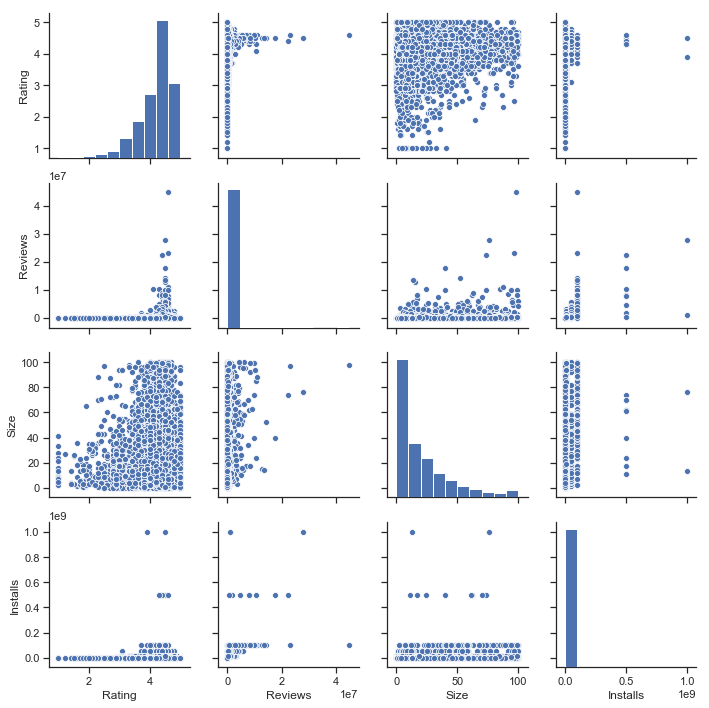

In [38]:
select=new_app[['Rating', 'Reviews', 'Size', 'Installs']]
print(select.head())
sns.set(style="ticks", color_codes=True)
pairsns=sns.pairplot(select)

Based on the above pairplots, it seems that there is no apparent correlation/regression among rating, review, app size and app installs. However, further regression and statistical analysis is performed to test these hypothesis.

#### Review vs. Rating

C:\Users\hxia\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\hxia\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


LinregressResult(slope=0.024394214717576863, intercept=3.982053289752914, rvalue=0.15630390790384124, pvalue=1.211827402320123e-39, stderr=0.0018399600775978336)

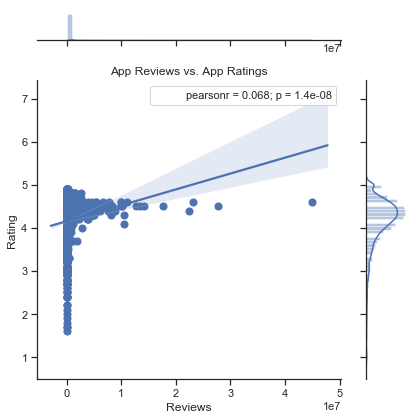

In [39]:
review_reg=sns.jointplot(x="Reviews", y="Rating", data=select, x_estimator=np.mean, kind='reg')
review_reg.annotate(stats.pearsonr)
plt.title('App Reviews vs. App Ratings')
plt.tight_layout()
scipy.stats.linregress(select['Reviews'].apply(np.log),select['Rating'])

The statistical analysis suggests that there is a very weak positive correlation between the app review times and rating. Highly rated apps tend to have more reviews. 

#### Size vs. Rating

C:\Users\hxia\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\hxia\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


LinregressResult(slope=0.0015492628927878756, intercept=4.12697997226311, rvalue=0.06297241431297602, pvalue=1.2858649084914406e-07, stderr=0.0002930720073432804)

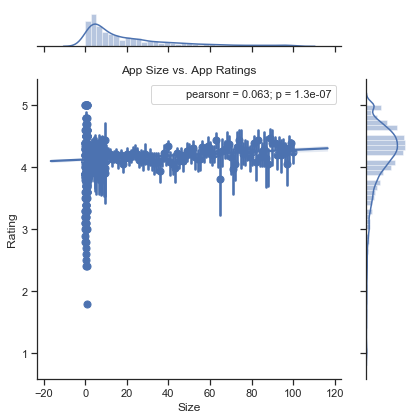

In [40]:
_=sns.jointplot(x="Size", y="Rating", data=select, x_estimator=np.mean, kind='reg')
_.annotate(stats.pearsonr)
plt.title('App Size vs. App Ratings')
plt.tight_layout()
scipy.stats.linregress(select['Size'],select['Rating'])

There is also a very weak positive correlation between the app size and rating. It is likely that the bigger the app, the more comprehensive and well-designed to win high ratings.

#### Installs vs. Rating

C:\Users\hxia\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\hxia\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


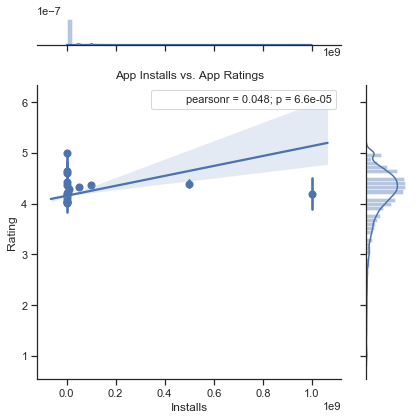

In [41]:
_=sns.jointplot(x="Installs", y="Rating", data=select, x_estimator=np.mean, kind='reg')
_.annotate(stats.pearsonr)
plt.title('App Installs vs. App Ratings')
plt.tight_layout()

It also turns out that the more installs, the higher rating an app is likely to get. 

#### Size vs. Installs

C:\Users\hxia\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\hxia\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


LinregressResult(slope=0.04703675865326255, intercept=10.283654904124903, rvalue=0.2980085322457334, pvalue=5.66301821903563e-144, stderr=0.0017983563683761927)

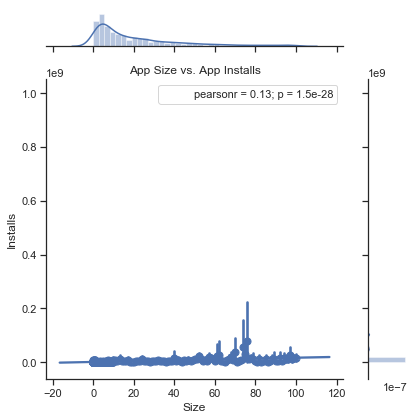

In [42]:
_=sns.jointplot(x="Size", y="Installs", data=select, x_estimator=np.mean, kind='reg')
_.annotate(stats.pearsonr)
plt.title('App Size vs. App Installs')
plt.tight_layout()
scipy.stats.linregress(select['Size'],select['Installs'].apply(np.log))

Bigger app, more installs.

#### Installs vs. Review

C:\Users\hxia\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\hxia\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


LinregressResult(slope=0.9486568388735294, intercept=-3.4034942371773624, rvalue=0.949861009409496, pvalue=0.0, stderr=0.003727357770870512)

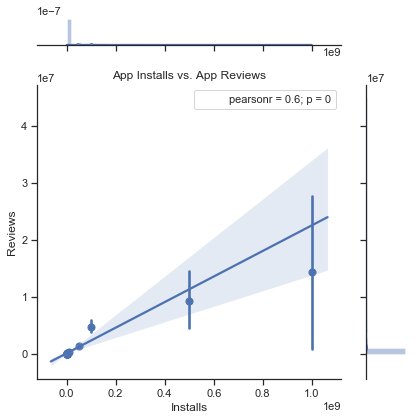

In [43]:
_=sns.jointplot(x="Installs", y="Reviews", data=select, x_estimator=np.mean, kind='reg')
_.annotate(stats.pearsonr)
plt.title('App Installs vs. App Reviews')
plt.tight_layout()
scipy.stats.linregress(select['Installs'].apply(np.log),select['Reviews'].apply(np.log))

And obviously, more installs lead to more reviews.

#### Size vs. Review

C:\Users\hxia\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\hxia\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


LinregressResult(slope=0.05343175921468339, intercept=6.160392992266437, rvalue=0.3389547343404442, pvalue=2.7193981796989594e-188, stderr=0.0017701851577793667)

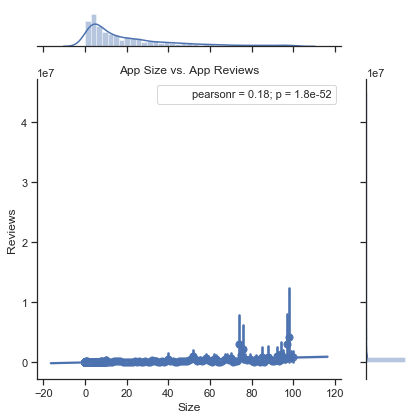

In [44]:
_=sns.jointplot(x="Size", y="Reviews", data=select, x_estimator=np.mean, kind='reg')
_.annotate(stats.pearsonr)
plt.title('App Size vs. App Reviews')
plt.tight_layout()
scipy.stats.linregress(select['Size'],select['Reviews'].apply(np.log))

Also, bigger apps have more reviews.

### 6. Data exploration for Review dataset

In [45]:
new_app=new_app.drop_duplicates('App')
new_rev.info()
new_app.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37427 entries, 0 to 64230
Data columns (total 5 columns):
App                       37427 non-null object
Translated_Review         37427 non-null object
Sentiment                 37427 non-null object
Sentiment_Polarity        37427 non-null float64
Sentiment_Subjectivity    37427 non-null float64
dtypes: float64(2), object(3)
memory usage: 1.7+ MB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 7021 entries, 0 to 10840
Data columns (total 14 columns):
App               7021 non-null object
Category          7021 non-null object
Rating            7021 non-null float64
Reviews           7021 non-null int64
Size              7021 non-null float64
Installs          7021 non-null int64
Type              7021 non-null object
Price             7021 non-null float64
Content Rating    7021 non-null object
Genres            7021 non-null object
Last Updated      7021 non-null datetime64[ns]
Current Ver       7021 non-null object
Android Ver  

In [46]:
new_rev.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000
5,10 Best Foods for You,Best way,Positive,1.00,0.300000


Two datasets are merged on shared column 'App'. The merged dataset is named as merge.

In [47]:
merge=pd.merge(new_rev, new_app, on='App', how='left')
print(merge.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37427 entries, 0 to 37426
Data columns (total 18 columns):
App                       37427 non-null object
Translated_Review         37427 non-null object
Sentiment                 37427 non-null object
Sentiment_Polarity        37427 non-null float64
Sentiment_Subjectivity    37427 non-null float64
Category                  24069 non-null object
Rating                    24069 non-null float64
Reviews                   24069 non-null float64
Size                      24069 non-null float64
Installs                  24069 non-null float64
Type                      24069 non-null object
Price                     24069 non-null float64
Content Rating            24069 non-null object
Genres                    24069 non-null object
Last Updated              24069 non-null datetime64[ns]
Current Ver               24069 non-null object
Android Ver               24069 non-null object
exp_rating                24069 non-null float64
dtypes: dat

In [48]:
merge.head(5)

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,exp_rating
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333,HEALTH_AND_FITNESS,4.0,2490.0,3.8,500000.0,Free,0.0,Everyone 10+,Health & Fitness,2017-02-17,1.9,2.3.3 and up,54.59815
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462,HEALTH_AND_FITNESS,4.0,2490.0,3.8,500000.0,Free,0.0,Everyone 10+,Health & Fitness,2017-02-17,1.9,2.3.3 and up,54.59815
2,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000,HEALTH_AND_FITNESS,4.0,2490.0,3.8,500000.0,Free,0.0,Everyone 10+,Health & Fitness,2017-02-17,1.9,2.3.3 and up,54.59815
3,10 Best Foods for You,Best idea us,Positive,1.00,0.300000,HEALTH_AND_FITNESS,4.0,2490.0,3.8,500000.0,Free,0.0,Everyone 10+,Health & Fitness,2017-02-17,1.9,2.3.3 and up,54.59815
4,10 Best Foods for You,Best way,Positive,1.00,0.300000,HEALTH_AND_FITNESS,4.0,2490.0,3.8,500000.0,Free,0.0,Everyone 10+,Health & Fitness,2017-02-17,1.9,2.3.3 and up,54.59815


In the merge dataset, Sentiment_Polarity describes how strong a positive or negative the review is. And the Sentiment_Subjectivity describes how subjective the review opinion is. The lower subjectivity the review has, the more un-biased the review is, and the more reliable the review is supposedly to be. So both sentiment polarity and subjectivity can be potentially used to predict the app rating.

### 7. Sentiment Polarity and Subjectivity Distribution

C:\Users\hxia\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,1,'Sentiment Polarity Density Plot')

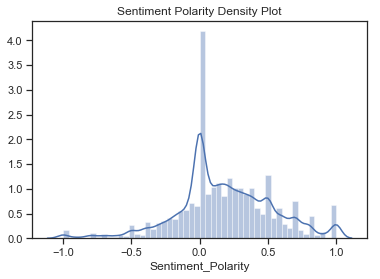

In [49]:
sns.distplot(merge['Sentiment_Polarity'])
plt.title('Sentiment Polarity Density Plot')

It seems that most of the reviews tend to be positive than negative. And the reviews dominantly fall between barely to slightly positive than highly positive or highly negative. There is also a spike at 0.0. This could be due to the imperfection of the natural language process: people use drastically inconsistent and versatile words and phrases to express their emotions and opinions, it is very likely that the vocabulary used during the natural language process is insufficient to correctly identify the true polarity of the review. Therefore, many reviews may not be properly processed and labeld with low polarity.

C:\Users\hxia\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,1,'Sentiment Subjectivity Density Plot')

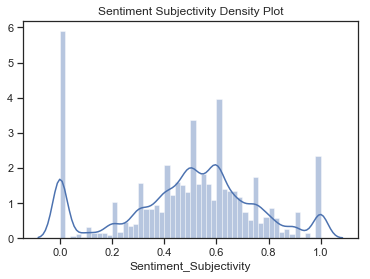

In [50]:
sns.distplot(merge['Sentiment_Subjectivity'])
plt.title('Sentiment Subjectivity Density Plot')

The majority of the subjectivity scores falls between 0.2 and 0.8 (very subjective to very onjective). And there are also two spikes (extremely subjective and extremely subjective) observed at 0.0 and 1.0. The vocabulary insufficiency issue could also occur in the subjectivity analysis process.   

Text(0.5,1,'Distribution of Polarity in each category')

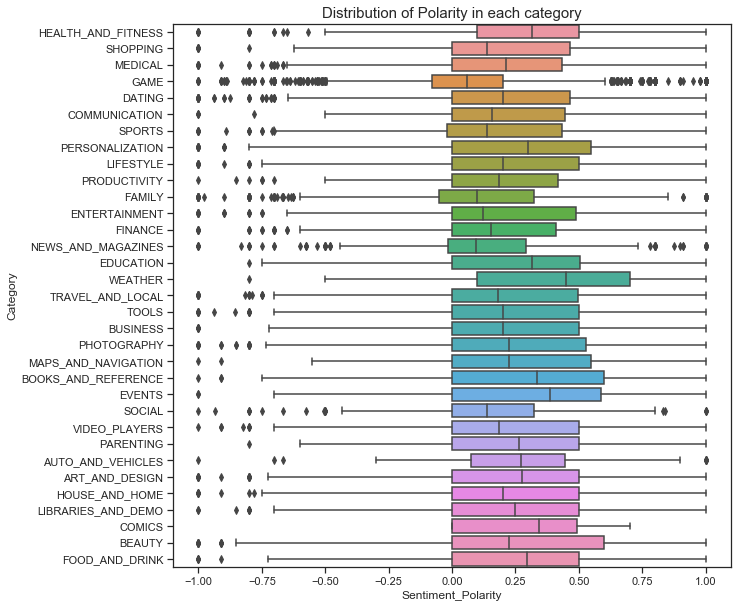

In [51]:
fig, ax = plt.subplots(figsize=(10,10))
box4=sns.boxplot(x='Sentiment_Polarity', y="Category", data=merge)
#box4.set_xticklabels(box4.get_xticklabels(), rotation=90)
plt.title('Distribution of Polarity in each category', fontsize=15)


Game, News and magzine, and Social apps have the smallest polarity ranges and most outliers, and their reviews tend to be neutral and mildly positive. Weather, personalization, books and beauty apps have the widest polarity ranges and least outliers, with whose reviews being dominantly mildly positive to positive.

Text(0.5,1,'Distribution of Subjectivity in each category')

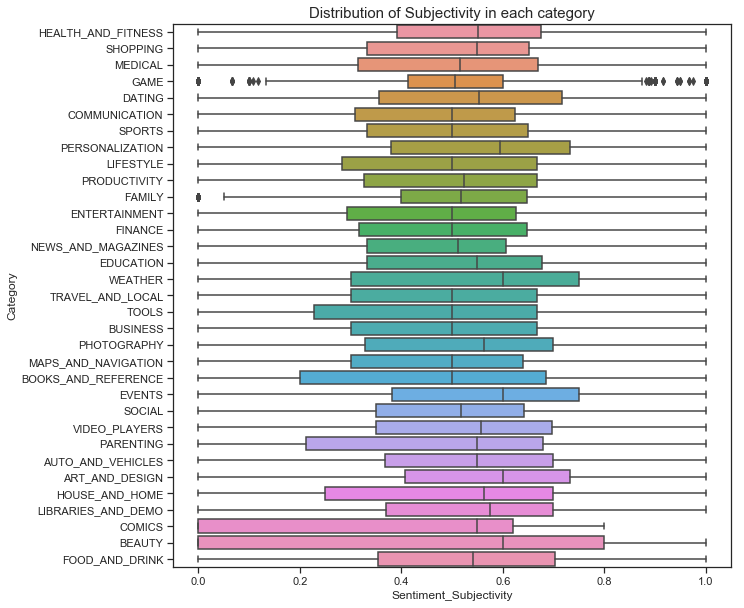

In [52]:
fig, ax = plt.subplots(figsize=(10,10))
box4=sns.boxplot(x='Sentiment_Subjectivity', y="Category", data=merge)
#box4.set_xticklabels(box4.get_xticklabels(), rotation=90)
plt.title('Distribution of Subjectivity in each category', fontsize=15)


For most app categories, the reviews are moderately subjective, and lie between 0.3 to 0.7. Two categories,Beauty and Comics have the widest subjectivity range, from extremely objective (0.0) to fairly subjective (0.8). The apps under these two categories are more likely to recieve objective reviews than the rest.

### 8. App Sentiment Polarity and Subjectivity vs. Rating

In [53]:
ave_rating=merge.dropna(axis=0, how='any').groupby(by='App').mean()['Rating']
ave_polarity=merge.dropna(axis=0, how='any').groupby(by='App').mean()['Sentiment_Polarity']
ave_sub=merge.dropna(axis=0, how='any').groupby(by='App').mean()['Sentiment_Subjectivity']

#### Polarity vs. Rating

C:\Users\hxia\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\hxia\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


LinregressResult(slope=0.4925667059279767, intercept=4.1720337486930665, rvalue=0.24530786231456336, pvalue=3.137523012519902e-09, stderr=0.08182172806723405)

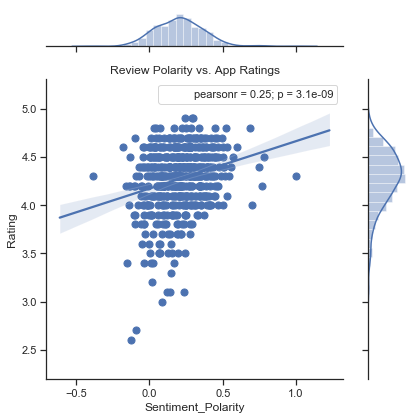

In [54]:
polarity_reg=sns.jointplot(ave_polarity,ave_rating, x_estimator=np.mean, kind='reg')
polarity_reg.annotate(stats.pearsonr)
plt.title('Review Polarity vs. App Ratings')
plt.tight_layout()
scipy.stats.linregress(ave_polarity,ave_rating)

It looks like there is a strong positive correlation between review polarity and app ratings. The higher polarity, the higher ratings.

#### Subjectivity vs. Rating

C:\Users\hxia\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\hxia\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


LinregressResult(slope=0.8413215429188198, intercept=3.8578224093624955, rvalue=0.21427410623403859, pvalue=2.529693741546604e-07, stderr=0.16120481204821627)

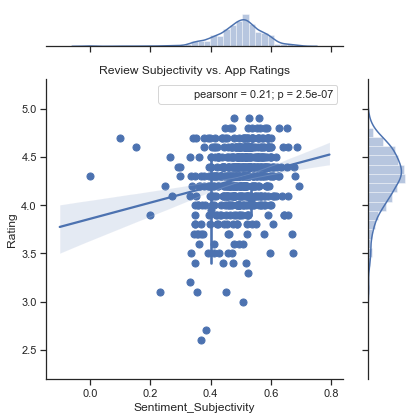

In [55]:
sub_reg=sns.jointplot(ave_sub, ave_rating, x_estimator=np.mean, kind='reg')
sub_reg.annotate(stats.pearsonr)
plt.title('Review Subjectivity vs. App Ratings')
plt.tight_layout()
scipy.stats.linregress(ave_sub, ave_rating)

Interestingly, review subjectivity is also positively correlated with app ratings. The higher subjectivity, the higher ratings.

### 9. Predicting rating using review polarity and subjectivity via multi linear regresssion

In [56]:
regdata=pd.DataFrame({'rating':ave_rating, 'sub':ave_sub, 'pola':ave_polarity})
x=regdata[['pola', 'sub']]
y=regdata[['rating']]

import statsmodels.api as sm
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

model = smf.ols(formula='rating ~ pola + sub', data=regdata)
results_formula = model.fit()
results_formula.params

Intercept    3.889215
pola         0.400885
sub          0.611506
dtype: float64

The multi regression equation is : Rating = 3.889 + 0.4* Polarity + 0.61 * Subjectivity

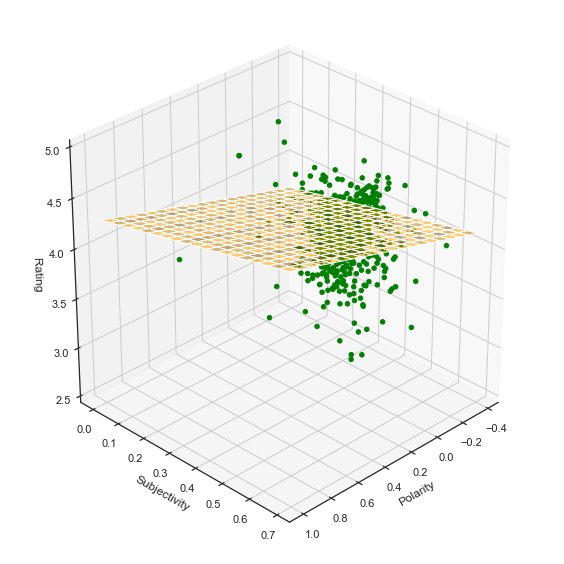

In [57]:
# Prepare the 3d plot.
x1_min=regdata.pola.min()
x1_max=regdata.pola.max()
x2_min=regdata['sub'].min()
x2_max=regdata['sub'].max()
x_surf, y_surf = np.meshgrid(np.linspace(x1_min, x1_max, 20),np.linspace(x2_min, x2_max, 20))
onlyX = pd.DataFrame({'pola': x_surf.ravel(), 'sub': y_surf.ravel()})
fittedY=results_formula.predict(exog=onlyX)

fig = plt.figure(figsize=(8,8))
plt.rcParams['legend.fontsize'] = 10
ax = fig.add_subplot(111, projection='3d')
ax.scatter(regdata['pola'],regdata['sub'],regdata['rating'],c='green', marker='o', alpha=1)
ax.plot_surface(x_surf,y_surf,fittedY.values.reshape(x_surf.shape), color='orange', alpha=0.5)
ax.set_xlabel('Polarity')
ax.set_ylabel('Subjectivity')
ax.set_zlabel('Rating')
ax.view_init(30, 45)
plt.tight_layout()
plt.show()


In [58]:
y_pred = results_formula.predict(x)
from sklearn.metrics import r2_score
print('Variance score: %.2f' % r2_score(y, y_pred) + ' (1 is perfect prediction.)')

Variance score: 0.08 (1 is perfect prediction.)


The variance score of this multi-regression model is only 0.08, with 1 being the perfect prediction. Therefore, the multi linear regression equation: Rating = 3.889 + 0.4* Polarity + 0.61 * Subjectivity did not provide very accurate prediction of App rating. Non-linear regression should be investigated for the next step. 

### 10. Hypothesis testing

According to our previous correlation analysis, we noticed that:

#### 1) free apps tend to have more download
#### 2) bigger size apps tend to have higher ratings
#### 3) app category may affect the review sentiment and eventually ratings

The price, size and the genre of an app are all factors that can be controlled by app developer and deisgn companies. 
Although weak correlations were observed in previous correlation analyis, theses hypothesises need to be tested. And the conclusions from these tests may benefit app designers.


#### 1) Do free apps tend to have more download?
A two sample bootstrao test will be used to examine this hypothesis.

In [59]:
#A two-sample bootstrap hypothesis test for difference of means

# Generate shifted arrays
free = new_app[new_app.Type=='Free']['Installs']
paid = new_app[new_app.Type=='Paid']['Installs']
mean_inst=new_app.Installs.mean()
           
free_shift = free-free.mean() + mean_inst
paid_shift = paid-paid.mean() + mean_inst
empirical_diff_means=free.mean()-paid.mean()

def bootstrap_replicate_1d(data, func):
    """Generate bootstrap replicate of 1D data."""
    bs_sample = np.random.choice(data, len(data))
    return func(bs_sample) 

def draw_bs_reps(data, func, size=1):
    """Draw bootstrap replicates."""

    # Initialize array of replicates: bs_replicates
    bs_replicates = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_replicates[i] = bootstrap_replicate_1d(data, func)

    return bs_replicates

# Compute 10,000 bootstrap replicates from shifted arrays
bs_replicates_free = draw_bs_reps(free_shift, np.mean, size=10000)
bs_replicates_paid = draw_bs_reps(paid_shift, np.mean, size=10000)

# Get replicates of difference of means: bs_replicates
bs_replicates = bs_replicates_free-bs_replicates_paid

# Compute and print p-value: p
p = np.sum(bs_replicates >= empirical_diff_means) / len(bs_replicates)
print('p-value =', p)
print('Free apps have',"{0:.2f}".format(empirical_diff_means) , 'more downloads than paid apps.')


p-value = 0.0
Free apps have 4758709.46 more downloads than paid apps.


#### Conclusion 1: The p-value of 0.0 suggests that free apps do have much more downloads than paid apps. 

#### 2) Do bigger size apps tend to have higher ratings?

In [60]:
# Define the cut-off between a small size app and a big size app:
cutoff=new_app.Size.median()

In [61]:
# Generate shifted arrays
big = new_app[new_app.Size>=cutoff]['Rating']
small = new_app[new_app.Size<cutoff]['Rating']
mean_rate=new_app.Rating.mean()
           
big_shift = big-big.mean() + mean_rate
small_shift = small-small.mean() + mean_rate
empirical_diff_rate=big.mean()-small.mean()

def bootstrap_replicate_1d(data, func):
    """Generate bootstrap replicate of 1D data."""
    bs_sample = np.random.choice(data, len(data))
    return func(bs_sample) 

def draw_bs_reps(data, func, size=1):
    """Draw bootstrap replicates."""

    # Initialize array of replicates: bs_replicates
    bs_replicates = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_replicates[i] = bootstrap_replicate_1d(data, func)

    return bs_replicates

# Compute 10,000 bootstrap replicates from shifted arrays
bs_replicates_big = draw_bs_reps(big_shift, np.mean, size=10000)
bs_replicates_small = draw_bs_reps(small_shift, np.mean, size=10000)

# Get replicates of difference of means: bs_replicates
bs_replicates = bs_replicates_big-bs_replicates_small

# Compute and print p-value: p
p = np.sum(bs_replicates >= empirical_diff_rate) / len(bs_replicates)
print('p-value =', p)
print('Big apps (> 13 mb) have',"{0:.3f}".format(empirical_diff_rate) , 'higher rating than small apps (<13 mb).')


p-value = 0.0008
Big apps (> 13 mb) have 0.043 higher rating than small apps (<13 mb).


#### Conclusion 2: The p-value of <0.01 suggests that apps with bigger size, and potentially more comprehensive with more features may receive higher ratings.

#### 3) Do app category affect the review sentiment?

According to our previous analysis on Review dataset, apps under different categories may have different review sentiment polarities. When designing an app, one can classify the app under alternate ctaegories. In this case, does which category the same app is under affect the review? Here, for example, a weather forcasting app can be placed under either Weather category or Tool category. Here, we will test weather the review sentiment between the two categories is different.

In [62]:
# Generate shifted arrays
weather = merge[merge.Category=='WEATHER']['Sentiment_Polarity']
tool = merge[merge.Category=='TOOLS']['Sentiment_Polarity']
mean_pola=merge.Sentiment_Polarity.mean()
           
weather_shift = weather-weather.mean() + mean_pola
tool_shift = tool-tool.mean() + mean_pola
empirical_diff_pola=weather.mean()-tool.mean()

def bootstrap_replicate_1d(data, func):
    """Generate bootstrap replicate of 1D data."""
    bs_sample = np.random.choice(data, len(data))
    return func(bs_sample) 

def draw_bs_reps(data, func, size=1):
    """Draw bootstrap replicates."""

    # Initialize array of replicates: bs_replicates
    bs_replicates = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_replicates[i] = bootstrap_replicate_1d(data, func)

    return bs_replicates

# Compute 10,000 bootstrap replicates from shifted arrays
bs_replicates_weather = draw_bs_reps(weather_shift, np.mean, size=10000)
bs_replicates_tool = draw_bs_reps(tool_shift, np.mean, size=10000)

# Get replicates of difference of means: bs_replicates
bs_replicates = bs_replicates_weather-bs_replicates_tool

# Compute and print p-value: p
p = np.sum(bs_replicates >= empirical_diff_pola) / len(bs_replicates)
print('p-value =', p)
print('Weather apps have',"{0:.3f}".format(empirical_diff_pola) , 'higher positive sentiment reviews than Tool apps.')


p-value = 0.0
Weather apps have 0.155 higher positive sentiment reviews than Tool apps.


#### Conclusion 3: The p-value of <0.01 suggests that there is a difference in app review sentiment among different app categories. And this observation may vary case by case.

### Recommendations:
To win a higher app rating or downloads, the app designer may consider making the app free of charge, making the size bigger in size and equipped with more features and functions. And if possible, the app designers should consider placing the app under category , or designing the app for audeince with more positive review sentiment.  

## 11. Machine Learning

#### First, let's check what the two data sets look like after all the data wrangling and cleaning:

In [63]:
print(new_app.head())
print(new_rev.head())

                                                 App        Category  Rating  \
0     Photo Editor & Candy Camera & Grid & ScrapBook  ART_AND_DESIGN     4.1   
1                                Coloring book moana  ART_AND_DESIGN     3.9   
2  U Launcher Lite – FREE Live Cool Themes, Hide ...  ART_AND_DESIGN     4.7   
3                              Sketch - Draw & Paint  ART_AND_DESIGN     4.5   
4              Pixel Draw - Number Art Coloring Book  ART_AND_DESIGN     4.3   

   Reviews  Size  Installs  Type  Price Content Rating  \
0      159  19.0     10000  Free    0.0       Everyone   
1      967  14.0    500000  Free    0.0       Everyone   
2    87510   8.7   5000000  Free    0.0       Everyone   
3   215644  25.0  50000000  Free    0.0           Teen   
4      967   2.8    100000  Free    0.0       Everyone   

                      Genres Last Updated         Current Ver   Android Ver  \
0               Art & Design   2018-01-07               1.0.0  4.0.3 and up   
1  Art & Des

The App dataset contains both numerical and categorical variables. Numerical variables: number of reviews, number of installs, app size and app price. Categorical variables: category, number of installs, app type (free or paid), genres and content rating. We will try different machine learning models using a selection of variables. 

### 11.1 K- Nearest Neighbors

In [146]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

# Create feature and target arrays
X = new_app[['Reviews','Size','Installs','Price']]

# Since the target varaible can not be floats, we have to convert the target variable into either integer or string:
# the rating is rounded to the nearest integer.
y = [round(x) for x in new_app['Rating']]



# Split into training and test set
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state=14)

# Create a k-NN classifier with 7 neighbors: knn
knn = KNeighborsClassifier(n_neighbors=7)

# Fit the classifier to the training data
knn.fit(X_train, y_train)

# Print the accuracy
print('The K-nearest model with neighbors=7 results in a accuracy score of',"{0:.3f}".format(knn.score(X_test, y_test)))



The K-nearest model with neighbors=7 results in a accuracy score of 0.681


##### Now we will examien how n_neighbor parameter affects the prediction accuracy: with n_neighbor ranging from 1 to16.

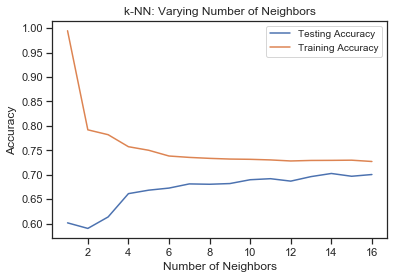

In [147]:
neighbors = np.arange(1, 17)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

# Loop over different values of k
for i, k in enumerate(neighbors):
    # Setup a k-NN Classifier with k neighbors: knn
    knn = KNeighborsClassifier(n_neighbors=k)

    # Fit the classifier to the training data
    knn.fit(X_train, y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)

    #Compute accuracy on the testing set
    test_accuracy[i] = knn.score(X_test, y_test)

# Generate plot
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()


__Based on the plot, K-nearest neighbor model has the highest testing accuracy with n_neighbor =14, resulting in a testing accuracy of 0.75 and a training accuracy of 0.7. The training accuracy generally decreases with increasing n_neighbors and plateaus with n_neighbor >8. The testing accuracy generally plateaus with n_neighbor >=14.__

__Using sklearn confusion matrix and classification report to evaluate the prediction:__

In [148]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# Instantiate a k-NN classifier: knn
knn = KNeighborsClassifier(n_neighbors=14)

# Fit the classifier to the training data
knn.fit(X_train, y_train)

# Predict the labels of the test data: y_pred
y_pred = knn.predict(X_test)

# Generate the confusion matrix and classification report
print('The Knn model with n_neighbors=14 results in an accuracy score of',"{0:.3f}".format(knn.score(X_test, y_test)))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(knn, X, y, cv=5)

# Print the 5-fold cross-validation scores
print(cv_scores)

# Print the average 5-fold cross-validation score
print("Average 5-Fold CV Score: ","{0:.5f}".format(np.mean(cv_scores)))
knnscore= knn.score(X_test, y_test)
knncv=np.mean(cv_scores)

The Knn model with n_neighbors=14 results in an accuracy score of 0.702
[[  0   0  14   5]
 [  0   0 104   8]
 [  0   1 899  56]
 [  0   0 230  88]]
             precision    recall  f1-score   support

          2       0.00      0.00      0.00        19
          3       0.00      0.00      0.00       112
          4       0.72      0.94      0.82       956
          5       0.56      0.28      0.37       318

avg / total       0.62      0.70      0.64      1405

[0.6913229  0.70128023 0.7252669  0.7125535  0.71754636]
Average 5-Fold CV Score:  0.70959


C:\Users\hxia\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


__The model precision, recall and F1 score are from 62% to 70%, with an average CV score of 0.71, which indicate this K-nearest neighbor model provides good predictions.__

### 11.2. Multi-Linear Regression model

In [152]:
# Import necessary modules
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Since regression model can predict the App rating in numerical datatype, we will convert the target variable back to 
# floating data.

y = new_app['Rating']

# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=16)

# Create the regressor: reg_all
reg_all = LinearRegression()

# Fit the regressor to the training data
reg_all.fit(X_train, y_train)

# Predict on the test data: y_pred
y_pred = reg_all.predict(X_test)

# Compute and print R^2 and RMSE
print("R^2: {}".format(reg_all.score(X_test, y_test)))
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error: {}".format(rmse))


R^2: 0.006882353421771348
Root Mean Squared Error: 0.5501628272927044


__A quick check of the multi linear regression model: R2 is far less than 0.1, which indicates that multi linear model gives very poor prediction.__

#### 5-fold Cross Validation for multi linear model

In [154]:
# Compute 5-fold cross-validation scores: cv_scores
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(reg_all, X, y, cv=5)

# Print the 5-fold cross-validation scores
print(cv_scores)

# Print the average 5-fold cross-validation score
print("Average 5-Fold CV Score: ","{0:.5f}".format(np.mean(cv_scores)))
MLRscore = reg_all.score(X_test, y_test)
MLRcv =np.mean(cv_scores)

[-2.11784271e-01 -2.71308627e-03 -4.37416555e-05 -2.78989888e-03
 -1.93486813e-02]
Average 5-Fold CV Score:  -0.04734


__As indicated by the CV score of -0.04734, this multi-linear model did a poor job at prediction.__

__Lasso Regression__

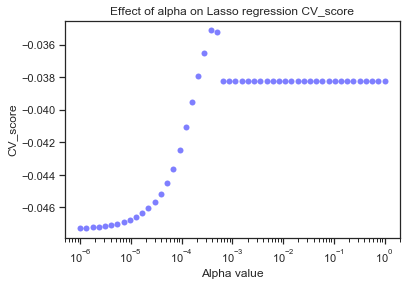

In [157]:
# Import Lasso
from sklearn.linear_model import Lasso

# Instantiate a lasso regressor: lasso, at varying alpha from 10^-6 to 1

alpha_space = np.logspace(-6, 0, 50)
lasso_avg_cv_scores=[]

for x in alpha_space:
    lasso = Lasso(alpha=x, normalize=True)
    lasso.fit(X_train, y_train)
    cv_scores = np.mean(cross_val_score(lasso, X, y, cv=5))
    lasso_avg_cv_scores.append(cv_scores)
    

fig = plt.figure()
ax = plt.gca()
ax.plot(alpha_space, lasso_avg_cv_scores, 'o', c='blue', alpha=0.5, markeredgecolor='none')
ax.set_xscale('log')
plt.title('Effect of alpha on Lasso regression CV_score')
plt.xlabel('Alpha value')
plt.ylabel('CV_score')
lassobest = Lasso(alpha=0.0003, normalize=True)
lassobest.fit(X_train, y_train)
lassoscore = lassobest.score(X_test, y_test)
lassocv =np.max(lasso_avg_cv_scores)

__As we can see from the plot, alpha did affect the Lasso regression performance. However, the prediction by Lasso regression did not improve compared to multi linear regression.__

### 11.3. logistic regression model

In [163]:
# Import the necessary modules
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

# Since the target varaible can not be floats, we have to convert the target variable into either integer or string:
# the rating is rounded to the nearest integer and converted to string.
y = [(round(x)) for x in new_app['Rating']]

# We will also need to add the categorical variable into the predictors
X = new_app[['Reviews','Size','Installs','Price','Category','Type','Genres','Content Rating']]


__Create dummy varaibles for categorical parameters:__

In [164]:
# Create dummy variables: df_region
dummy = pd.get_dummies(X)

# Print the columns of df_region
print(dummy.columns)

Index(['Reviews', 'Size', 'Installs', 'Price', 'Category_ART_AND_DESIGN',
       'Category_AUTO_AND_VEHICLES', 'Category_BEAUTY',
       'Category_BOOKS_AND_REFERENCE', 'Category_BUSINESS', 'Category_COMICS',
       ...
       'Genres_Video Players & Editors;Creativity',
       'Genres_Video Players & Editors;Music & Video', 'Genres_Weather',
       'Genres_Word', 'Content Rating_Adults only 18+',
       'Content Rating_Everyone', 'Content Rating_Everyone 10+',
       'Content Rating_Mature 17+', 'Content Rating_Teen',
       'Content Rating_Unrated'],
      dtype='object', length=156)


In [165]:
# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(dummy, y, test_size = 0.2, random_state=19)

# Create the classifier: logreg
logreg = LogisticRegression()

# Fit the classifier to the training data
logreg.fit(X_train, y_train)

# Predict the labels of the test set: y_pred
y_pred = logreg.predict(X_test)

# Compute and print the confusion matrix and classification report
print('The logistic regression model results in an accuracy score of',"{0:.4f}".format(logreg.score(X_test, y_test)))

cv_scores = cross_val_score(logreg, dummy, y, cv=5)
# Print the average 5-fold cross-validation score
print("Average 5-Fold CV Score: ","{0:.5f}".format(np.mean(cv_scores)))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

The logistic regression model results in an accuracy score of 0.7210
Average 5-Fold CV Score:  0.70133
[[  0   0   0   3   0]
 [  0   0   0  17   0]
 [  0   0   0 104   1]
 [  0   0   0 972  18]
 [  0   0   0 249  41]]
             precision    recall  f1-score   support

          1       0.00      0.00      0.00         3
          2       0.00      0.00      0.00        17
          3       0.00      0.00      0.00       105
          4       0.72      0.98      0.83       990
          5       0.68      0.14      0.23       290

avg / total       0.65      0.72      0.63      1405



C:\Users\hxia\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


__The logistic regression model results in an accuracy score of 0.7210, which is almost the same as the KNN model, same for the precision, recall and f1-score.__

__The next step will be to use hyperparameter tuning method such as GridSearchCV to find the best parameter for logistic regression.__

__Hyperparameter tuning using GridSearchCV__

In [168]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Setup the hyperparameter grid
c_space = np.logspace(-10, 0, 20)
param_grid = {'C': c_space}

# Instantiate a logistic regression classifier: logreg
logreg = LogisticRegression()

# Instantiate the GridSearchCV object: logreg_cv
logreg_cv = GridSearchCV(logreg, param_grid, cv=5)

# Fit it to the data
logreg_cv.fit(dummy, y)

# Print the tuned parameter and score
print("Tuned Logistic Regression Parameters: {}".format(logreg_cv.best_params_))
print("Best score is {}".format(logreg_cv.best_score_))
logregbest= LogisticRegression(C=1e-10).fit(X_train, y_train)
logregscore=logregbest.score(X_test, y_test)
logregcv=logreg_cv.best_score_

Tuned Logistic Regression Parameters: {'C': 1e-10}
Best score is 0.701609457342259


__The best C parameter for the logistic regression model is C=10^-10, the resulting CV score is just above 0.70.__

### 11.4. Decision Trees 

In [171]:
# Import necessary modules
from scipy.stats import randint
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV

X_train, X_test, y_train, y_test = train_test_split(dummy, y, test_size = 0.2, random_state=19)
# Instantiate a Decision Tree classifier: tree
tree = DecisionTreeClassifier()

# Fit it to the data
tree.fit(X_train,y_train)

print('The decision tree model results in an accuracy score of',"{0:.3f}".format(tree.score(X_test, y_test)))


The decision tree model results in an accuracy score of 0.601


__The decision tree model gives an intial prediction accuracy of over 60%, we will use GridSearchCV to tune the hyperparameters in order to improve the model prediction.__

In [176]:
# Setup the parameters and distributions to sample from: param_dist
param_dist = {"max_depth": np.arange(1, 11),
              "max_features": np.arange(1, 11),
              "min_samples_leaf": np.arange(1, 11),
              "criterion": ["gini", "entropy"]}
# Instantiate the RandomizedSearchCV object: tree_cv
tree_cv = GridSearchCV(tree, param_dist, cv=5)

tree_cv.fit(dummy, y)

# Print the tuned parameters and score
print("Tuned Decision Tree Parameters: {}".format(tree_cv.best_params_))
print("Best score is {}".format(tree_cv.best_score_))
treebest=tree_cv.best_estimator_.fit(X_train,y_train)
treescore= treebest.score(X_test, y_test)
treecv=tree_cv.best_score_

Tuned Decision Tree Parameters: {'criterion': 'gini', 'max_depth': 4, 'max_features': 8, 'min_samples_leaf': 2}
Best score is 0.7037459051417178


__With GridSearchCV, we are able to find the best parameters from the pre-designated range:'criterion': 'gini', 'max_depth': 4, 'max_features': 8, 'min_samples_leaf': 2. The tuned hyperparameters are able to improve the model from a CV score of 0.6 to 0.704. Interestingly, the decision tree model gives very similar prediction accuracy compared to KNN model and logistic regression model.__

### 11.5. RandomForest Classifier and Regressor

### RandomForest Classifier

In [177]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV

X_train, X_test, y_train, y_test = train_test_split(dummy, y, test_size = 0.2, random_state=19)
# Instantiate a Decision Tree classifier: tree
randomclass = RandomForestClassifier(n_estimators=100, max_depth=2)

# Fit it to the data
randomclass.fit(X_train,y_train)
print('The RandomForest Classifier model results in an accuracy score of',"{0:.3f}".format(randomclass.score(X_test, y_test)))


The RandomForest Classifier model results in an accuracy score of 0.705


__The RandomForest Classifier gives an intial prediction accuracy of over 70.5%, we will use RandomizedSearchCV to tune the hyperparameters in order to improve the model prediction.__

__Tuning RandomForest Classifier using RandomizedSearchCV__

In [179]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 200, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)


{'n_estimators': [100, 111, 122, 133, 144, 155, 166, 177, 188, 200], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [180]:
rfc = RandomForestClassifier()
rfc_random = RandomizedSearchCV(estimator = rfc, param_distributions = random_grid, cv = 5, random_state=21)
rfc_random.fit(X_train,y_train)

# Print the tuned parameters and score
print("Tuned randomforest Parameters: {}".format(rfc_random.best_params_))
print("Best score is {}".format(rfc_random.best_score_))


Tuned randomforest Parameters: {'n_estimators': 188, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': None, 'bootstrap': False}
Best score is 0.7126068376068376


__The best parameters for the random forest classifier are: 'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 50, 'bootstrap': True. And the best CV score is 0.713.__

In [181]:
# Generate the randomforestclassifier model using the best parameters.
best_rfc_random = rfc_random.best_estimator_

# Compute and print the accuracy score by the tuned randomforestclassifier
print('The tuned randomforestclassifier model results in an accuracy score of',"{0:.4f}".
      format(best_rfc_random.score(X_test, y_test)))

rfcscore=best_rfc_random.score(X_test, y_test)
rfccv=rfc_random.best_score_

The tuned randomforestclassifier model results in an accuracy score of 0.7310


__The model prediction accuracy improved from 70.5% to 73.1%.__

### RandomForest Regressor

In [93]:
# We need convert the target variable back to numerical floating digits.
y = new_app['Rating']

X_train, X_test, y_train, y_test = train_test_split(dummy, y, test_size = 0.2)
# Instantiate a RandomForest Regressor: randomreg
randomreg = RandomForestRegressor(n_estimators=100, max_depth=2)

# Fit it to the data
randomreg.fit(X_train,y_train)
print('The RandomForest Regressor model results in an accuracy score of',"{0:.3f}".format(randomreg.score(X_test, y_test)))


The RandomForest Regressor model results in an accuracy score of 0.054


In [182]:
rfr = RandomForestRegressor()
rfr_random = RandomizedSearchCV(estimator = rfr, param_distributions = random_grid, cv = 5)
rfr_random.fit(X_train,y_train)
print("Tuned randomforest Regressor Parameters: {}".format(rfr_random.best_params_))
print("Best score is {}".format(rfr_random.best_score_))


Tuned randomforest Regressor Parameters: {'n_estimators': 188, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': None, 'bootstrap': False}
Best score is 0.07987618166077351


In [183]:
rfrscore=randomreg.score(X_test, y_test)
rfrcv=rfr_random.best_score_

__As we can see, the RandomForest Regressor did a poor job at the prediction and the best CV is 0.08 compared to a best CV score of 0.712 using randomforestClassifier.__

### 11.6. Naive Bayes Model

In [184]:
from sklearn.naive_bayes import GaussianNB
y = [(round(x)) for x in new_app['Rating']]
X = new_app[['Reviews','Size','Installs','Price','Category','Type','Genres','Content Rating']]
dummy = pd.get_dummies(X)
X_train, X_test, y_train, y_test = train_test_split(dummy, y, test_size = 0.2, random_state=28)
nb = GaussianNB()
nb.fit(X_train,y_train)
y_pred = nb.predict(X_test)

# Generate the confusion matrix and classification report

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

cv_scores = cross_val_score(nb, dummy, y, cv=5)
# Print the average 5-fold cross-validation score
print("Average 5-Fold CV Score for GaussianNB: ","{0:.5f}".format(np.mean(cv_scores)))

[[  2   0   0   0   0]
 [ 17   7   0   0   0]
 [ 33  52  10   7   0]
 [162 357 266 215   0]
 [115  61  54  46   1]]
             precision    recall  f1-score   support

          1       0.01      1.00      0.01         2
          2       0.01      0.29      0.03        24
          3       0.03      0.10      0.05       102
          4       0.80      0.21      0.34      1000
          5       1.00      0.00      0.01       277

avg / total       0.77      0.17      0.25      1405

Average 5-Fold CV Score for GaussianNB:  0.16186


In [185]:
print('The RandomForest Classifier model results in an accuracy score of',"{0:.3f}".format(nb.score(X_test, y_test)))

The RandomForest Classifier model results in an accuracy score of 0.167


In [187]:
cv_scores = cross_val_score(nb, dummy, y, cv=5)
# Print the average 5-fold cross-validation score
print("Average 5-Fold CV Score: ","{0:.5f}".format(np.mean(cv_scores)))
GNBscore=nb.score(X_test, y_test)
GNBcv=np.mean(cv_scores)

Average 5-Fold CV Score:  0.16186


In [196]:
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB()
mnb.fit(X_train,y_train)
y_pred = mnb.predict(X_test)

# Generate the confusion matrix and classification report

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Print the average 5-fold cross-validation score
print("Average 5-Fold CV Score for MultinomialNB:","{0:.5f}".format(np.mean(cross_val_score(mnb, dummy, y, cv=5))))

[[  2   0   0   0   0]
 [ 14   4   3   2   1]
 [ 20  36  32   8   6]
 [109 219 314 169 189]
 [ 95  19  48  39  76]]
             precision    recall  f1-score   support

          1       0.01      1.00      0.02         2
          2       0.01      0.17      0.03        24
          3       0.08      0.31      0.13       102
          4       0.78      0.17      0.28      1000
          5       0.28      0.27      0.28       277

avg / total       0.61      0.20      0.26      1405

Average 5-Fold CV Score for MultinomialNB: 0.24354


In [197]:
MNBscore=mnb.score(X_test, y_test)
MNBcv=np.mean(cross_val_score(mnb, dummy, y, cv=5))

__As we can see, the Naive Bayes Model also did a poor job predicting the App ratings, with an average CV score of 0.245.__

### 11.7. Support Vector Machine

In [119]:
from sklearn import svm, grid_search
def svc_param_selection(X, y, nfolds):
    Cs = [0.001, 0.01, 0.1, 1, 10]
    gammas = [0.001, 0.01, 0.1, 1]
    param_grid = {'C': Cs, 'gamma' : gammas}
    grid_search = GridSearchCV(svm.SVC(kernel='rbf'), param_grid, cv=nfolds)
    grid_search.fit(X, y)
    grid_search.best_params_
    return grid_search.best_params_

svc_param_selection(dummy, y,5)

C:\Users\hxia\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Users\hxia\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


{'C': 0.1, 'gamma': 0.001}

__The best SVM parameters for Radial basis function kernel are: 'C': 0.1, 'gamma': 0.001.__

In [131]:
X = new_app[['Reviews','Size','Installs','Price','Category','Type','Genres','Content Rating']]
dummy = pd.get_dummies(X)
X_train, X_test, y_train, y_test = train_test_split(dummy, y, test_size = 0.2, random_state=28)
best_svm =svm.SVC(kernel='rbf', C=0.1, gamma= 0.001)
best_svm.fit(X_train,y_train)
y_pred = best_svm.predict(X_test)
print(confusion_matrix(y_test, y_pred))
best_svm.score(X_test, y_test)


[[  0   0   0   1   1]
 [  0   0   0  23   1]
 [  0   0   0  96   6]
 [  0   0   0 974  26]
 [  0   0   0 235  42]]


0.7231316725978648

In [198]:
SVMscore=best_svm.score(X_test, y_test)
SVMcv=np.mean(cross_val_score(best_svm, dummy, y, cv=5))

In [132]:
print("Average 5-Fold CV Score for SVM:","{0:.5f}".format(np.mean(cross_val_score(best_svm, dummy, y, cv=5))))

Average 5-Fold CV Score for SVM: 0.71074


__The SVM model has a decent prediction accuracy of 72.3%, with a CV score of 0.71__

### 11.8. Summary of model performance

__Comparison of model performance__

In [202]:
modelname=['K-Nearest Neighbors','Multi-Linear Regression model','Lasso Linear Regression','Logistic Regression model',
           'Decision Trees', 'RandomForest Classifier','RandomForest Regressor','Gaussian Naive Bayes',
           'Multinomial Naive Bayes','Support Vector Machine']
testacc=[knnscore,MLRscore,lassoscore,logregscore,treescore,rfcscore,rfrscore,GNBscore, MNBscore,SVMscore]
cvscore=[knncv,MLRcv,lassocv,logregcv,treecv,rfccv,rfrcv,GNBcv, MNBcv,SVMcv]
columnname=['Algorithm Name','Algorithm Test Accuracy', 'Algorithm Mean CV score']

In [214]:
data_tuples = list(zip(modelname,testacc, cvscore))
table=pd.DataFrame(data_tuples, columns=columnname)
table.sort_values(by = ['Algorithm Test Accuracy'], ascending = False, inplace = True)
table

,Algorithm Name,Algorithm Test Accuracy,Algorithm Mean CV score
5,RandomForest Classifier,0.730961,0.712607
9,Support Vector Machine,0.723132,0.710737
3,Logistic Regression model,0.720996,0.701609
4,Decision Trees,0.706762,0.703746
0,K-Nearest Neighbors,0.702491,0.709594
8,Multinomial Naive Bayes,0.201423,0.243544
7,Gaussian Naive Bayes,0.167260,0.161861
6,RandomForest Regressor,0.032486,0.079876
1,Multi-Linear Regression model,0.006882,-0.047336
2,Lasso Linear Regression,0.004129,-0.035129


__Conclusion 1: As shown in the table, RandomForest Classifier, Support Vector Machine, Logistic Regression, Decision Trees and K-Nearest Neighbors all give decent App rating prediction with over 70% accuracy, using number of reviews, number of installs, app size, app price, app category, number of installs, app type (free or paid), genres and content rating. Among all algorithms, randomforest classifier provides the highest test accuracy and mean cross validation score.__	

__Dataset Feature importance based on RandomForest Classifier model__

In [220]:
def plot_feature_importances(df):
    
    # Sort features according to importance
    df = df.sort_values('importance', ascending = False).reset_index()
    
    # Normalize the feature importances to add up to one
    df['importance_normalized'] = df['importance'] / df['importance'].sum()

    # Make a horizontal bar chart of feature importances
    plt.figure(figsize = (10, 6))
    ax = plt.subplot()
    
    # Need to reverse the index to plot most important on top
    ax.barh(list(reversed(list(df.index[:15]))), 
            df['importance_normalized'].head(15), 
            align = 'center', edgecolor = 'k')
    
    # Set the yticks and labels
    ax.set_yticks(list(reversed(list(df.index[:15]))))
    ax.set_yticklabels(df['feature'].head(15))
   
    # Plot labeling
    plt.xlabel('Normalized Importance'); plt.title('Feature Importances by RandomForest Classifier')
    plt.show()
    
    return df


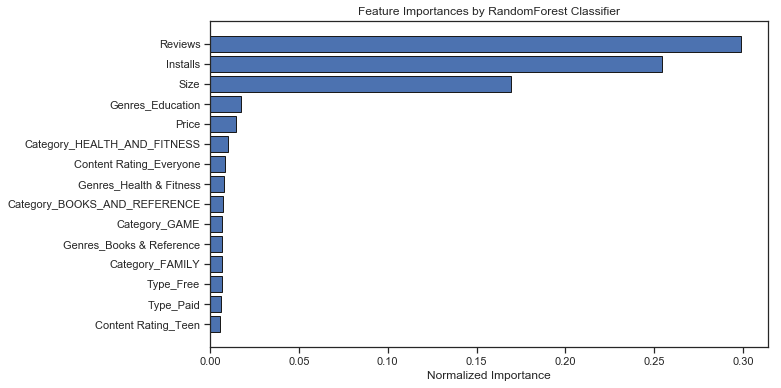

In [221]:
importance = best_rfc_random.feature_importances_
feature = dummy.columns
fi = pd.DataFrame()
fi['importance'] = importance
fi['feature'] = feature
fi_sorted = plot_feature_importances(fi)

__Conclusion 2: As shown in the figure, the number of reviews, number of installs and the app size are the most critical App parameters in determining the overall app ratings.__	

 ## 12. Supplementary Info
 

#### Preliminary Exploratory Machine Learning Algorithm Analysis without Hyperparameter Tuning

In [222]:
from sklearn.model_selection import cross_validate, ShuffleSplit, GridSearchCV
from sklearn.linear_model import LogisticRegressionCV, SGDClassifier
from sklearn import ensemble, naive_bayes, svm, tree, discriminant_analysis, neighbors, feature_selection

In [139]:
MLA = [ # Generalized Linear Models
        LogisticRegressionCV(),
    
        # SVM
        svm.SVC(probability = True),
        svm.LinearSVC(),
    
        # KNN
        neighbors.KNeighborsClassifier(weights='distance'),
    
        #Discriminant Analysis
        discriminant_analysis.LinearDiscriminantAnalysis(),
        discriminant_analysis.QuadraticDiscriminantAnalysis(),
     
        # Naive Bayes
        naive_bayes.BernoulliNB(),
        naive_bayes.GaussianNB(),
    
        #Trees    
        tree.DecisionTreeClassifier(),
    
        # Ensemble Methods
        ensemble.AdaBoostClassifier(),
        ensemble.BaggingClassifier(),
        ensemble.ExtraTreesClassifier(),
        ensemble.GradientBoostingClassifier(),
        ensemble.RandomForestClassifier() ]

cv_split = ShuffleSplit(n_splits = 10, test_size = .2, train_size = .8, random_state = 40)
MLA_columns = ['MLA Name','MLA Train Accuracy Mean', 'MLA Test Accuracy Mean','MLA Time']
MLA_compare = pd.DataFrame(columns = MLA_columns)
X = new_app[['Reviews','Size','Installs','Price','Category','Type','Genres','Content Rating']]
dummy = pd.get_dummies(X)
y=best_svm =svm.SVC(kernel='rbf', C=0.1, gamma= 0.001)


In [144]:
row_index = 0
for alg in MLA:
    MLA_name = alg.__class__.__name__
    MLA_compare.loc[row_index, 'MLA Name'] = MLA_name
    cv_results = cross_validate(alg, dummy,y, cv  = cv_split, return_train_score=True)
    MLA_compare.loc[row_index, 'MLA Time'] = cv_results['fit_time'].mean()
    MLA_compare.loc[row_index, 'MLA Train Accuracy Mean'] = cv_results['train_score'].mean()
    MLA_compare.loc[row_index, 'MLA Test Accuracy Mean'] = cv_results['test_score'].mean()       
    row_index+=1

C:\Users\hxia\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Users\hxia\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Users\hxia\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Users\hxia\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Users\hxia\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Users\hxia\AppData\Local\Continuum\anaconda3\lib\site-packages\skle

C:\Users\hxia\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:682: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\hxia\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:682: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\hxia\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:682: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\hxia\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:682: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\hxia\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:682: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\hxia\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\discri

In [145]:
MLA_compare.sort_values(by = ['MLA Test Accuracy Mean'], ascending = False, inplace = True)
MLA_compare

,MLA Name,MLA Train Accuracy Mean,MLA Test Accuracy Mean,MLA Time
12,GradientBoostingClassifier,0.750814,0.705743,5.67862
1,SVC,0.843488,0.701139,56.6317
0,LogisticRegressionCV,0.695177,0.690176,2.88657
4,LinearDiscriminantAnalysis,0.689337,0.674798,0.0933658
13,RandomForestClassifier,0.974562,0.671761,0.0868808
10,BaggingClassifier,0.974847,0.671239,0.416893
6,BernoulliNB,0.671327,0.661462,0.0333967
11,ExtraTreesClassifier,0.999817,0.645373,0.103498
3,KNeighborsClassifier,0.999817,0.639487,0.0399198
9,AdaBoostClassifier,0.633578,0.621927,0.280577
